# Description

In [49]:
#-In this project the main objective is to predict has the client subscribed a term deposit.

#-In this project ML-Models created were Support Vector Machine(SVM), Logistic Regression, K-nearest neighbour(KNN), Decision
#Tree.

#-Libraries such as Numpy, Pandas, Seaborn, Matplotlib,etc were used.

#-HyperTuning were performed for KNN and also on SVM and Decision Tree using GridSearchCV.

#-OrdinalEncoder was used.

#-Scaling was done using StandardScaler.

#-To deal with the Imbalance Dataset UnderScaling with Centroid method was performed.

# Information about the Dataset:

In [44]:
#DataSet Link:- http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#
#
#   The data is related with direct marketing campaigns of a Portuguese banking institution. 
#  The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
 #  in order to access if the product (bank term deposit) would be (or not) subscribed. 
#
 #  There are two datasets: 
  # bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
#
 #  The classification goal is to predict if the client will subscribe a term deposit (variable y).
   
   
#   Input variables:
 #   bank client data:
  # 1 - age (numeric)
   #2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
   #                                    "blue-collar","self-employed","retired","technician","services") 
   #3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   #4 - education (categorical: "unknown","secondary","primary","tertiary")
   #5 - default: has credit in default? (binary: "yes","no")
   #6 - balance: average yearly balance, in euros (numeric) 
   #7 - housing: has housing loan? (binary: "yes","no")
   #8 - loan: has personal loan? (binary: "yes","no")
   
   #related with the last contact of the current campaign:
   #9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  #10 - day: last contact day of the month (numeric)
  #11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  #12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  #13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  #14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  #15 - previous: number of contacts performed before this campaign and for this client (numeric)
  #16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #Output variable (desired target):
  #17 - y - has the client subscribed a term deposit? (binary: "yes","no")   

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing data set
df = pd.read_csv("bank-full.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape #checking (rows,columns)

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# checking imbalance
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
#Above we can see that the data is imbalance

# Encoding

In [6]:
# selecting only thoses columns which has data type as object in order to perform encoding
catcol=df.select_dtypes(object).columns
print(catcol)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


In [7]:
df[catcol].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [8]:
#Using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0.0


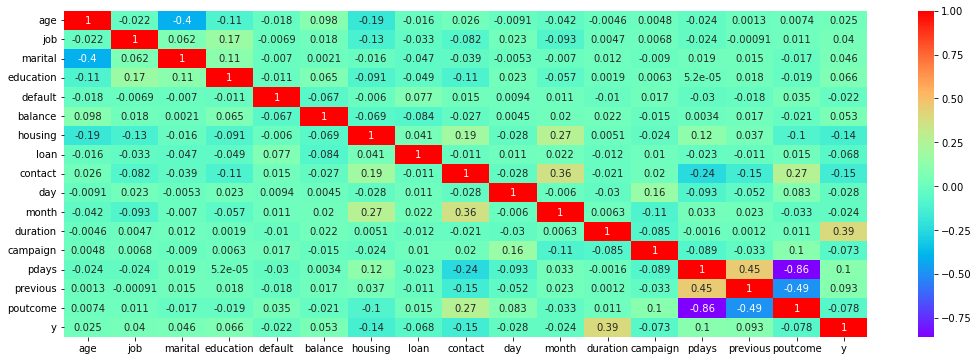

In [9]:
# generating heatmap for visualizating correlations amoungs the columns
plt.figure(figsize=(18,6))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

# Fixing Imbalance Data by using Underscaling with centroid method

In [10]:
# seperating features and target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
# centroid method forms clusters to remove the imbalance
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=42)
X,Y = cc.fit_resample(x,y)

In [12]:
print(f"Before Underscaling:\n{y.value_counts()}\n\nAfter Underscaling:\n{Y.value_counts()}")

Before Underscaling:
0.0    39922
1.0     5289
Name: y, dtype: int64

After Underscaling:
0.0    5289
1.0    5289
Name: y, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

# SVM Model along with Scaling using Pipe

In [14]:
# pipe are used to define steps in this case scaling then svm 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [15]:
pipe = Pipeline(
steps=[
 ("scaler",StandardScaler()),
 ("svm",SVC())
 ]
 )
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report
ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = pipe.score(xtrain,ytrain)
test = pipe.score(xtest,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8913043478260869
 ROC:- 0.891304347826087

 [[1344  243]
 [ 102 1485]]
               precision    recall  f1-score   support

         0.0       0.93      0.85      0.89      1587
         1.0       0.86      0.94      0.90      1587

    accuracy                           0.89      3174
   macro avg       0.89      0.89      0.89      3174
weighted avg       0.89      0.89      0.89      3174

Training Accuracy:- 0.9122096164235548
 Testing Accuracy:- 0.8913043478260869


Confusion Matrix:- 


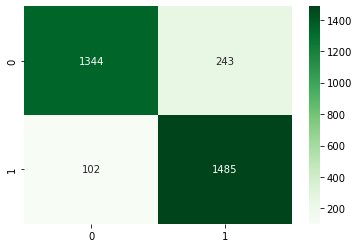

In [17]:
print("Confusion Matrix:- ")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Greens",fmt="d")
plt.show()

## Scaling data

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrains = sc.fit_transform(xtrain)
xtests = sc.transform(xtest)

### Applying GridSerchCV

In [19]:
# Hypertuning for svm
from sklearn.model_selection import GridSearchCV

parameter = {
"C":[0.1,1,10],
"gamma":[0.1,0.01,0.001],
"kernel":["rbf","poly"]
}

In [20]:
grid = GridSearchCV(SVC(), parameter, verbose=2,n_jobs=-1 )
grid.fit(xtrains,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             verbose=2)

In [21]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [22]:
grid.best_estimator_

SVC(C=1, gamma=0.1)

In [23]:
# applying the best parameters 
svm =grid.best_estimator_
svm.fit(xtrains,ytrain)
ypred = svm.predict(xtests)

In [24]:
ypred = svm.predict(xtests)

ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = svm.score(xtrains,ytrain)
test = svm.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8862633900441084
 ROC:- 0.8862633900441083

 [[1333  254]
 [ 107 1480]]
               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88      1587
         1.0       0.85      0.93      0.89      1587

    accuracy                           0.89      3174
   macro avg       0.89      0.89      0.89      3174
weighted avg       0.89      0.89      0.89      3174

Training Accuracy:- 0.9269313884386818
 Testing Accuracy:- 0.8862633900441084


Confusion Matrix:- 


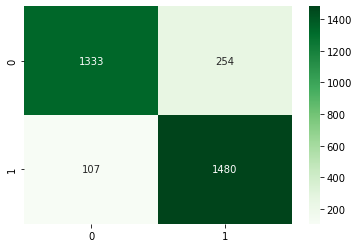

In [25]:
print("Confusion Matrix:- ")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Greens",fmt="d")
plt.show()

# Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
logreg.fit(xtrains,ytrain)

LogisticRegression()

In [27]:
ypred = logreg.predict(xtests)

ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = logreg.score(xtrains,ytrain)
test = logreg.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.7763074984247007
 ROC:- 0.7763074984247007

 [[1254  333]
 [ 377 1210]]
               precision    recall  f1-score   support

         0.0       0.77      0.79      0.78      1587
         1.0       0.78      0.76      0.77      1587

    accuracy                           0.78      3174
   macro avg       0.78      0.78      0.78      3174
weighted avg       0.78      0.78      0.78      3174

Training Accuracy:- 0.7703943814154511
 Testing Accuracy:- 0.7763074984247007


Confusion Matrix:- 


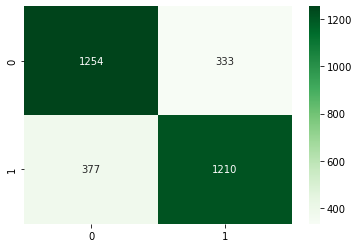

In [28]:
print("Confusion Matrix:- ")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Greens",fmt="d")
plt.show()

# KNN Model

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrains,ytrain)

KNeighborsClassifier()

In [30]:
ypred = knn.predict(xtests)

ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = knn.score(xtrains,ytrain)
test = knn.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8746061751732829
 ROC:- 0.8746061751732829

 [[1362  225]
 [ 173 1414]]
               precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1587
         1.0       0.86      0.89      0.88      1587

    accuracy                           0.87      3174
   macro avg       0.88      0.87      0.87      3174
weighted avg       0.88      0.87      0.87      3174

Training Accuracy:- 0.9078876283090221
 Testing Accuracy:- 0.8746061751732829


#### Hypertuning for KNN

In [31]:
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrains,ytrain)
    train = knn.score(xtrains,ytrain)
    test = knn.score(xtests,ytest)
    print(f"{i} {train} {test} {train-test}")

1 1.0 0.8632640201638311 0.13673597983616892
2 0.9293625067531064 0.8339634530560807 0.09539905369702573
3 0.9208535926526202 0.8724007561436673 0.048452836508952934
4 0.9111291193949217 0.8563327032136105 0.05479641618131115
5 0.9078876283090221 0.8746061751732829 0.03328145313573927
6 0.9004592112371691 0.8657844990548205 0.03467471218234863
7 0.9027552674230146 0.8768115942028986 0.025943673220116037
8 0.8984332793084819 0.8683049779458097 0.030128301362672194
9 0.8951917882225824 0.8787019533711405 0.016489834851441842
10 0.8903295515937332 0.8724007561436673 0.01792879545006587
11 0.8916801728795246 0.8758664146187776 0.015813758260747046
12 0.8869529983792545 0.8730308758664146 0.013922122512839863
13 0.8878984332793085 0.8755513547574039 0.012347078521904642
14 0.8851971907077255 0.8705103969754253 0.014686793732300196
15 0.8857374392220422 0.8720856962822936 0.013651742939748579
16 0.8820907617504052 0.8701953371140516 0.011895424636353624
17 0.8831712587790383 0.87397605545053

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(xtrains,ytrain)
ypred = knn.predict(xtests)

ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = knn.score(xtrains,ytrain)
test = knn.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8758664146187776
 ROC:- 0.8758664146187776

 [[1381  206]
 [ 188 1399]]
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      1587
         1.0       0.87      0.88      0.88      1587

    accuracy                           0.88      3174
   macro avg       0.88      0.88      0.88      3174
weighted avg       0.88      0.88      0.88      3174

Training Accuracy:- 0.87817396002161
 Testing Accuracy:- 0.8758664146187776


Confusion Matrix:- 


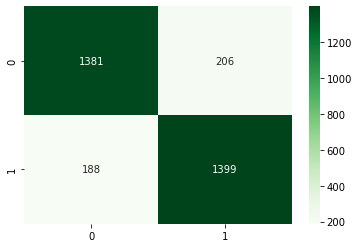

In [33]:
print("Confusion Matrix:- ")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Greens",fmt="d")
plt.show()

# Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrains, ytrain)

DecisionTreeClassifier()

In [35]:
ypred = model.predict(xtests)

ac = accuracy_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = model.score(xtrains,ytrain)
test = model.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8557025834908633
 ROC:- 0.8557025834908633

 [[1368  219]
 [ 239 1348]]
               precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1587
         1.0       0.86      0.85      0.85      1587

    accuracy                           0.86      3174
   macro avg       0.86      0.86      0.86      3174
weighted avg       0.86      0.86      0.86      3174

Training Accuracy:- 1.0
 Testing Accuracy:- 0.8557025834908633


#### GridSearchCV

In [36]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [37]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [38]:
grid_search = GridSearchCV(model, param_grid, cv=10, n_jobs=-1)
grid_search.fit(xtrains, ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [39]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [40]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [41]:
dt = grid_search.best_estimator_
dt.fit(xtrains,ytrain)
ypred = dt.predict(xtests)

In [42]:
ypred = dt.predict(xtests)

ac = accuracy_score(ytest,ypred)
ra = roc_auc_score(ytest,ypred)
cm = confusion_matrix(ytest,ypred)
cr = classification_report(ytest,ypred)
print(f"Accuracy:- {ac}\n ROC:- {ra}\n\n {cm}\n {cr}")

train = dt.score(xtrains,ytrain)
test = dt.score(xtests,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

Accuracy:- 0.8827977315689981
 ROC:- 0.8827977315689981

 [[1364  223]
 [ 149 1438]]
               precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      1587
         1.0       0.87      0.91      0.89      1587

    accuracy                           0.88      3174
   macro avg       0.88      0.88      0.88      3174
weighted avg       0.88      0.88      0.88      3174

Training Accuracy:- 0.9003241491085899
 Testing Accuracy:- 0.8827977315689981


Confusion Matrix:- 


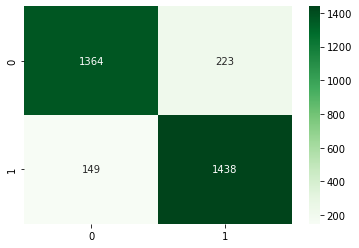

In [43]:
print("Confusion Matrix:- ")
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Greens",fmt="d")
plt.show()

# Conclusion

#### SVM Model:-

In [45]:
#Accuracy:- 0.8913043478260869
#ROC:- 0.891304347826087

#Conclusion Matrix:- 
# [[1344  243]
# [ 102 1485]]
 
#Classification Report:-
                
#                precision    recall  f1-score   support

#         0.0       0.93      0.85      0.89      1587
#         1.0       0.86      0.94      0.90      1587

#     accuracy                           0.89      3174
#   #macro avg       0.89      0.89      0.89      3174
#weighted avg       0.89      0.89      0.89      3174

#Training Accuracy:- 0.9122096164235548
# Testing Accuracy:- 0.8913043478260869

#### Logistic Regression Model:

In [46]:
#Accuracy:- 0.7763074984247007
#ROC:- 0.7763074984247007

#Conclusion Matrix:
# [[1254  333]
# [ 377 1210]]
 

#Classification Report:-
#               precision    recall  f1-score   support

#         0.0       0.77      0.79      0.78      1587
#         1.0       0.78      0.76      0.77      1587

#    accuracy                           0.78      3174
#   macro avg       0.78      0.78      0.78      3174
#weighted avg       0.78      0.78      0.78      3174

#Training Accuracy:- 0.7703943814154511
# Testing Accuracy:- 0.7763074984247007

#### KNN Model:-

In [47]:
#Accuracy:- 0.8758664146187776
# ROC:- 0.8758664146187776

#Confusion Matrix:-
# [[1381  206]
# [ 188 1399]]
 
#Classification Report:- 
#               precision    recall  f1-score   support

#         0.0       0.88      0.87      0.88      1587
#         1.0       0.87      0.88      0.88      1587

#    accuracy                           0.88      3174
#   macro avg       0.88      0.88      0.88      3174
#weighted avg       0.88      0.88      0.88      3174

#Training Accuracy:- 0.87817396002161
# Testing Accuracy:- 0.8758664146187776

#### Decision Tree Model:-

In [48]:
#Accuracy:- 0.8827977315689981
# ROC:- 0.8827977315689981

#Confusion Matrix:-
# [[1364  223]
# [ 149 1438]]
 
#Classification Report:- 
#               precision    recall  f1-score   support

#         0.0       0.90      0.86      0.88      1587
#         1.0       0.87      0.91      0.89      1587

#    accuracy                           0.88      3174
#   macro avg       0.88      0.88      0.88      3174
#weighted avg       0.88      0.88      0.88      3174

#Training Accuracy:- 0.9003241491085899
# Testing Accuracy:- 0.8827977315689981